# lec03_basic_model_practice

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas_profiling

# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# ----------------- 모델 ----------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


# seed 고정

In [4]:
tf.random.set_seed(1)
np.random.seed(1)

# data load

In [5]:
from keras.datasets import fashion_mnist

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

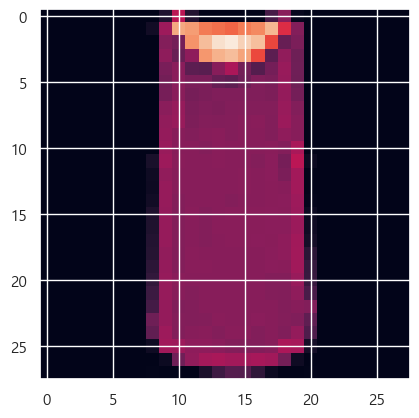

In [7]:
plt.imshow(X_train[2:3][0])     # 2번째 장
plt.show()

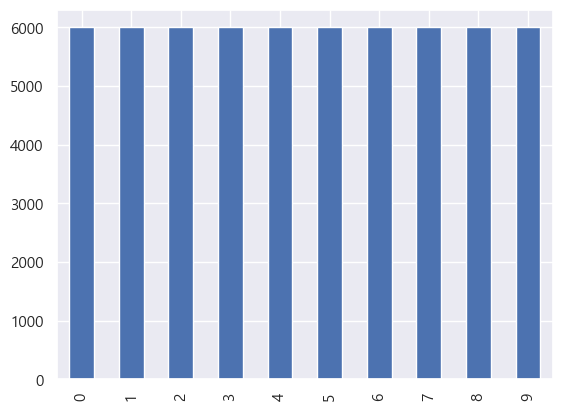

In [8]:
pd.Series(y_train).value_counts().sort_index().plot(kind = "bar")
plt.show()

In [9]:
y_train[:1]

array([9], dtype=uint8)

In [10]:
LABEL_NAME__ = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

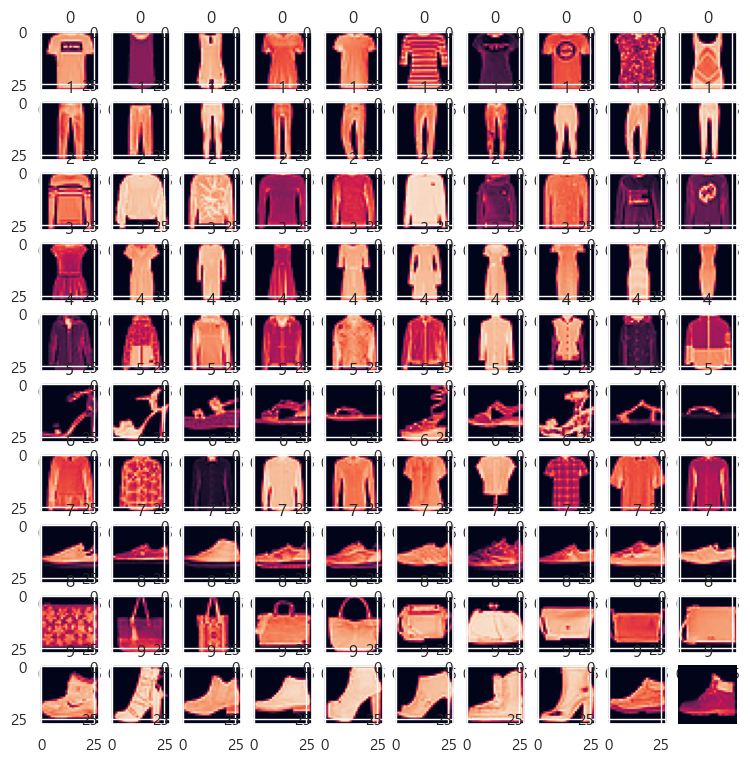

In [11]:
s = pd.Series(y_train)
fig, axes = plt.subplots(10,10, figsize = (9,9))
for i in range(0,10):
    idx = s[s.values == i].index
    for ii, idx in enumerate (idx[:10]):
        row = i 
        col = ii % 10
        # axes[row][col].imshow(X_train[i:i+1][0])
        axes[row][col].imshow(X_train[idx])
        axes[row][col].set_title(y_train[idx])
        plt.axis("off")
        plt.grid(False)
plt.show()

# 전처리

In [12]:
X_train_sc = X_train.reshape(-1,784)
X_test_sc = X_test.reshape(-1,784)



In [13]:
X_train_sc = X_train_sc / 255.0
# 소숫점으로 나와야 되니까 255.0으로 나눈다  >> 확실히 float으로 할려고
X_test_sc  = X_test_sc / 255.0
# X_train[:1]

In [14]:
from keras.utils import to_categorical

y_train_oh = to_categorical(y_train, num_classes=10, dtype="int")
y_test_oh = to_categorical(y_test, num_classes=10, dtype="int")
print(y_train[:1],y_train_oh[:1])
print()
print(y_test[:1],y_test_oh[:1])

[9] [[0 0 0 0 0 0 0 0 0 1]]

[9] [[0 0 0 0 0 0 0 0 0 1]]


# 모델

In [15]:
model = Sequential()
model.add(Dense(units=300, input_dim=784, activation='relu', kernel_initializer='glorot_normal')) #입력층
model.add(Dense(units=100,  activation='relu'))              #히든레이어
model.add(Dense(units=50,  activation='relu'))              #히든레이어
model.add(Dense(units=10,  activation='softmax'))           #3종 출력층
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [16]:
fit_hisroty = model.fit(X_train_sc, y_train_oh
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_sc, y_test_oh)  )

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.5538 - accuracy: 0.8083 - val_loss: 0.4154 - val_accuracy: 0.8489
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3836 - accuracy: 0.8627 - val_loss: 0.3892 - val_accuracy: 0.8588
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3421 - accuracy: 0.8744 - val_loss: 0.3552 - val_accuracy: 0.8722
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3149 - accuracy: 0.8839 - val_loss: 0.3634 - val_accuracy: 0.8712
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2939 - accuracy: 0.8914 - val_loss: 0.3407 - val_accuracy: 0.8764
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2802 - accuracy: 0.8954 - val_loss: 0.3198 - val_accuracy: 0.8861
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2631 - accuracy: 0.9023 - val_loss: 0.3383 - val_accuracy: 0.8832
Epoch 

# 예측

In [17]:
proba = model.predict(X_test_sc)
proba[:3]

313/313 [==============================] - 1s 2ms/step


array([[8.7942897e-07, 3.9315892e-06, 1.6076925e-05, 1.4105595e-05,
        6.0970060e-06, 6.9224755e-03, 8.9500090e-06, 4.8003636e-02,
        5.6062044e-07, 9.4502330e-01],
       [2.8706011e-06, 3.1639399e-10, 9.9774051e-01, 4.1831876e-09,
        2.0527544e-03, 3.6663892e-12, 2.0381776e-04, 6.8380475e-12,
        2.2286049e-09, 9.4933184e-10],
       [3.6969574e-08, 1.0000000e+00, 1.1288354e-09, 3.6128380e-09,
        4.5349596e-11, 2.9171154e-14, 4.1343964e-09, 3.9410491e-18,
        7.4092974e-14, 7.7083268e-15]], dtype=float32)

In [18]:
pred = np.argmax(proba, axis=1)


y_test = np.argmax(y_test_oh, axis=1)
print(pred[:3], y_test[:3])

[9 2 1] [9 2 1]


# 오답검증

In [19]:
cm = confusion_matrix(y_test,pred)
print(cm)

[[841   3  18  37   5   1  88   0   7   0]
 [  1 974   0  19   3   0   2   0   1   0]
 [ 12   0 784  17 114   0  73   0   0   0]
 [ 11  10   7 907  42   0  19   0   4   0]
 [  1   1  74  22 842   0  60   0   0   0]
 [  0   0   0   1   0 979   0  15   1   4]
 [124   2  66  41  69   0 692   0   6   0]
 [  0   0   0   0   0  23   0 958   0  19]
 [  9   0   6   3   9   2   5   4 962   0]
 [  0   0   0   0   0  24   1  38   0 937]]


In [20]:
ans_df = pd.DataFrame( {"y_test":y_test,"pred":pred} )
ans_df.head(2)

,y_test,pred
0,9,9
1,2,2


In [21]:
temp_df = ans_df[ans_df["y_test"]!=ans_df["pred"]]
temp_df=temp_df.sort_values("y_test")

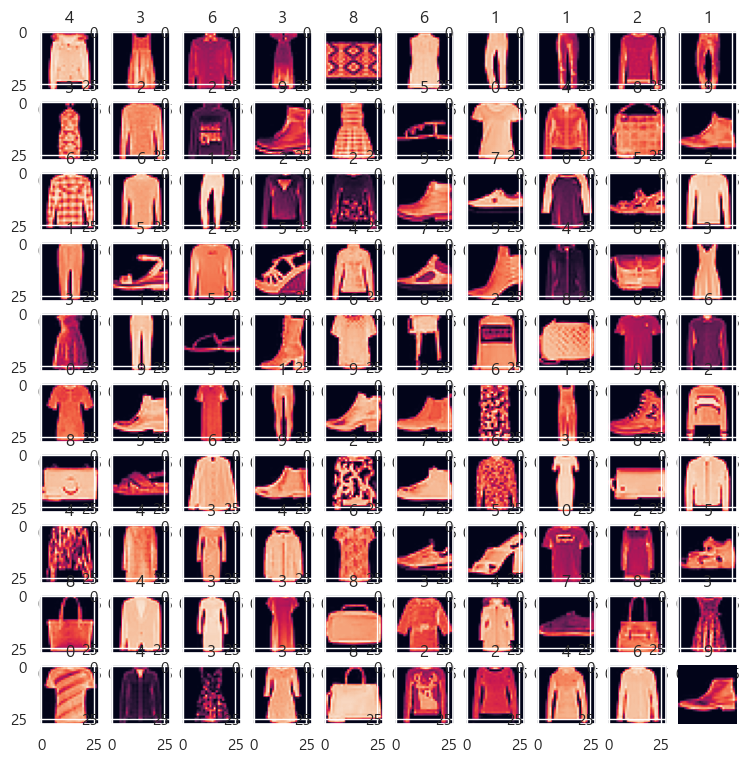

In [22]:

fig, axes = plt.subplots(10,10, figsize = (9,9))
for i, idx in enumerate (temp_df.index[:100]):
    row = i//10 
    col = i % 10
    # axes[row][col].imshow(X_train[i:i+1][0])
    axes[row][col].imshow(X_train[idx])
    axes[row][col].set_title(y_train[idx])
    plt.axis("off")
    plt.grid(False)
plt.show()

# 사용자 예측

In [23]:
import ipywidgets as widgets

In [24]:
widgets.IntSlider()

IntSlider(value=0)

In [25]:
btn = widgets.FileUpload(
    accept='image/*',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=True  # True to accept multiple files upload else False
)
display(btn)

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

In [26]:
from PIL import Image
import io
for i, dic in enumerate(btn.value):
    plt.subplot(1,  len(btn.value),       i+1)
    print(f"{dic['name']}  {dic['size']}")
    
    # ------------------------------------------------
    # addr = dic['content']                주소
    # io_obj = io.BytesIO(dic['content'])   읽고 쓸 수 있게
    # bbyte = dic['content'].tobytes()         꺼낼 수 있게 IO 객체
    #       
    # print(a, b, c)
    # ------------------------------------------------
    # display(widgets.Image(value=dic.content.tobytes()))
    # ------------------------------------------------
    img = Image.open(io.BytesIO(dic['content'])).resize((28, 28))   # PIL(python image library) 활용 이미지 핸들링
    plt.imshow(img)
    # ------------------------------------------------             # 학습 위한 차원 축소 / input_dim(1,784)
    print(np.array(img).shape,  np.array(img)[:, :, 1].shape)      # (28,28,3) 컬러, (28,28) 흑백
    
    img = np.array(img)[:, :, 1]                                   # [:, :, 1] 마지막 차원 날리기(1 대입)
    img = (np.expand_dims(img,0)).reshape(1,-1)                    # expand_dims 차원 확대, 0은 행추가(1은 열추가) // .reshape 차원축소 28*28를 784로
    print(img.shape) 

    
    img_scaler = (255-img)/255.0                                   # 엣지크롭 색반전(255-img) + 스케일링(/255.0)
    print(img_scaler.shape)
    proba = model.predict(img_scaler)
    print(np.argmax(proba))

In [27]:
LABEL_NAME__[5],LABEL_NAME__[6]

('Sandal', 'Shirt')